In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import functions and tools from keras
from keras.layers import Dense
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import load_img, img_to_array, to_categorical

In [3]:
# Store data from URL
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Data size
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (60000, 28, 28)
Test set size: (10000, 28, 28)


In [4]:
# Define the name of classes
name_class = { 0: 'T-shirt/top', 1: 'Trouser', 2:	'Pullover', 3: 'Dress', 4: 'Coat',
               5:	'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

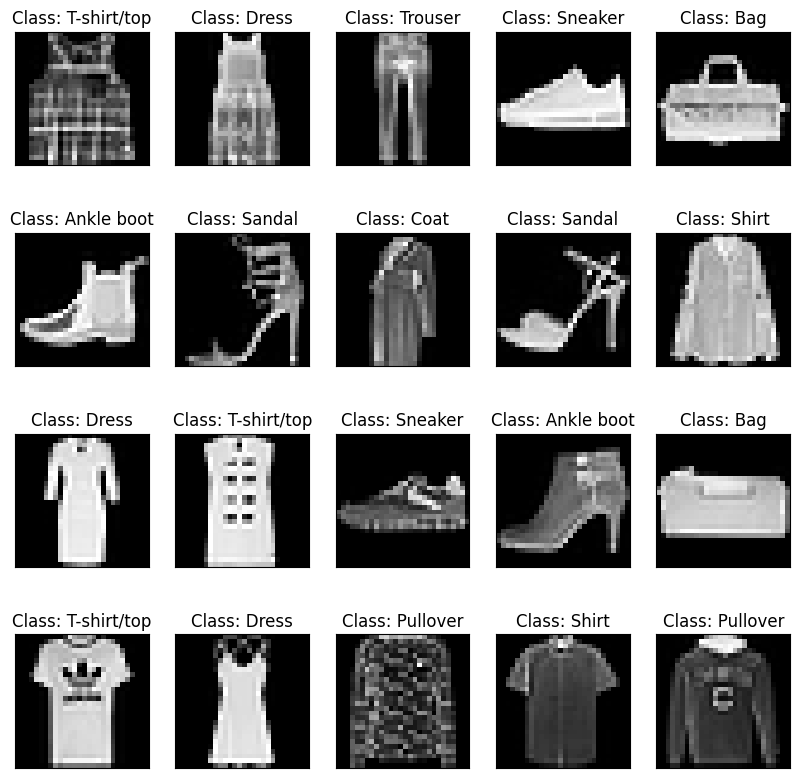

In [ ]:
from random import randint

# Display multiple images
fig_display = plt.figure(figsize=[10, 10])
chosen_idx = randint(1, 60000-21)

# Scan image in array
for indx in range(chosen_idx, chosen_idx+20, 1):
  axes = fig_display.add_subplot(4, 5, indx - chosen_idx +1)
  axes.imshow(X_train[indx, :, :], cmap='gray')
  axes.set_xticks([ ])
  axes.set_yticks([ ])
  axes.set_title("Class: {}".format(name_class[Y_train[indx]]))

In [5]:
# Reshape the sets
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Rescale within the byte range
X_train_scl = X_train.astype('float32')/255
X_test_scl  = X_test.astype('float32')/255

In [6]:
# One-hot encode the target classes
onehot_train = to_categorical(Y_train)
onehot_test  = to_categorical(Y_test)

# Display some instances
print(onehot_train[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from keras import Input, Model
from keras.layers import Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [ ]:
# Define constances
batch_size = 64
epochs     = 20
num_class  = 10

# Create model
model_CNN = Sequential()
  # CNN Layer
model_CNN.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28, 28, 1), padding='same'))    # 32 times of Conv.
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_CNN.add(Conv2D(64, (3, 3), activation='linear', padding='same'))    # 64 times of Conv
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_CNN.add(Conv2D(128, (3, 3), activation='linear', padding='same'))   # 128 times of Conv
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(MaxPooling2D(pool_size=(2,2), padding='same'))

  # ANN Layer
model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='linear'))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(Dense(num_class, activation='softmax'))

# Summarize model
model_CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

In [ ]:
from keras.losses import categorical_crossentropy

# Model compile
model_CNN.compile(loss= 'categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_histo = model_CNN.fit(X_train_scl, onehot_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
938/938 [==============================] - 82s 86ms/step - loss: 0.4367 - accuracy: 0.8423
Epoch 2/20
938/938 [==============================] - 81s 86ms/step - loss: 0.2744 - accuracy: 0.8991
Epoch 3/20
938/938 [==============================] - 81s 86ms/step - loss: 0.2285 - accuracy: 0.9160
Epoch 4/20
938/938 [==============================] - 81s 86ms/step - loss: 0.1970 - accuracy: 0.9276
Epoch 5/20
938/938 [==============================] - 86s 92ms/step - loss: 0.1731 - accuracy: 0.9362
Epoch 6/20
938/938 [==============================] - 84s 89ms/step - loss: 0.1514 - accuracy: 0.9429
Epoch 7/20
938/938 [==============================] - 82s 88ms/step - loss: 0.1293 - accuracy: 0.9506
Epoch 8/20
938/938 [==============================] - 81s 86ms/step - loss: 0.1122 - accuracy: 0.9574
Epoch 9/20
938/938 [==============================] - 94s 100ms/step - loss: 0.0942 - accuracy: 0.9650
Epoch 10/20
938/938 [==============================] - 92s 98ms/step - loss: 0.08

In [ ]:
# Save model
model_CNN.save('/content/drive/MyDrive/Colab Notebooks/Week 10/model_CNN_fashionMNIST.h5')

In [ ]:
# Model evaluation
test_loss, test_acc = model_CNN.evaluate(X_test_scl, onehot_test, verbose=False)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.4639551341533661
Test accuracy: 0.9203000068664551


In [ ]:
model_histo.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'Training and Testing Accuracy')

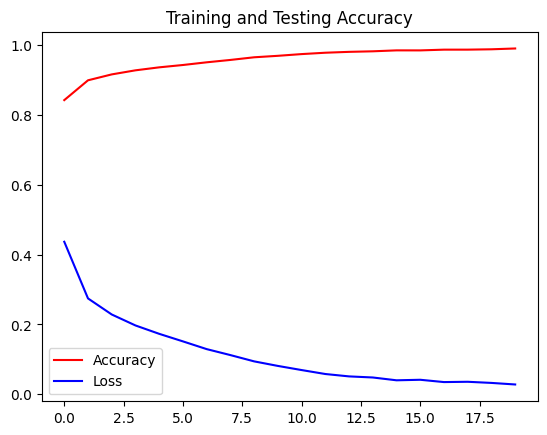

In [ ]:
# Model insights
accuracy_lst = model_histo.history['accuracy']
loss_lst = model_histo.history['loss']
# Make Plot
num_epoch = range(len(accuracy_lst))
plt.plot(num_epoch, accuracy_lst, 'r', label='Training Accuracy')
plt.plot(num_epoch, loss_lst, 'b', label='Training Loss')
plt.legend(['Accuracy', 'Loss'])
plt.title('Training and Testing Accuracy')

In [1]:
from keras.models import load_model

# Load model from file path
model_path = '/content/drive/MyDrive/Colab Notebooks/Week 10/model_CNN_fashionMNIST.h5'
load_model_CNN = load_model(model_path)

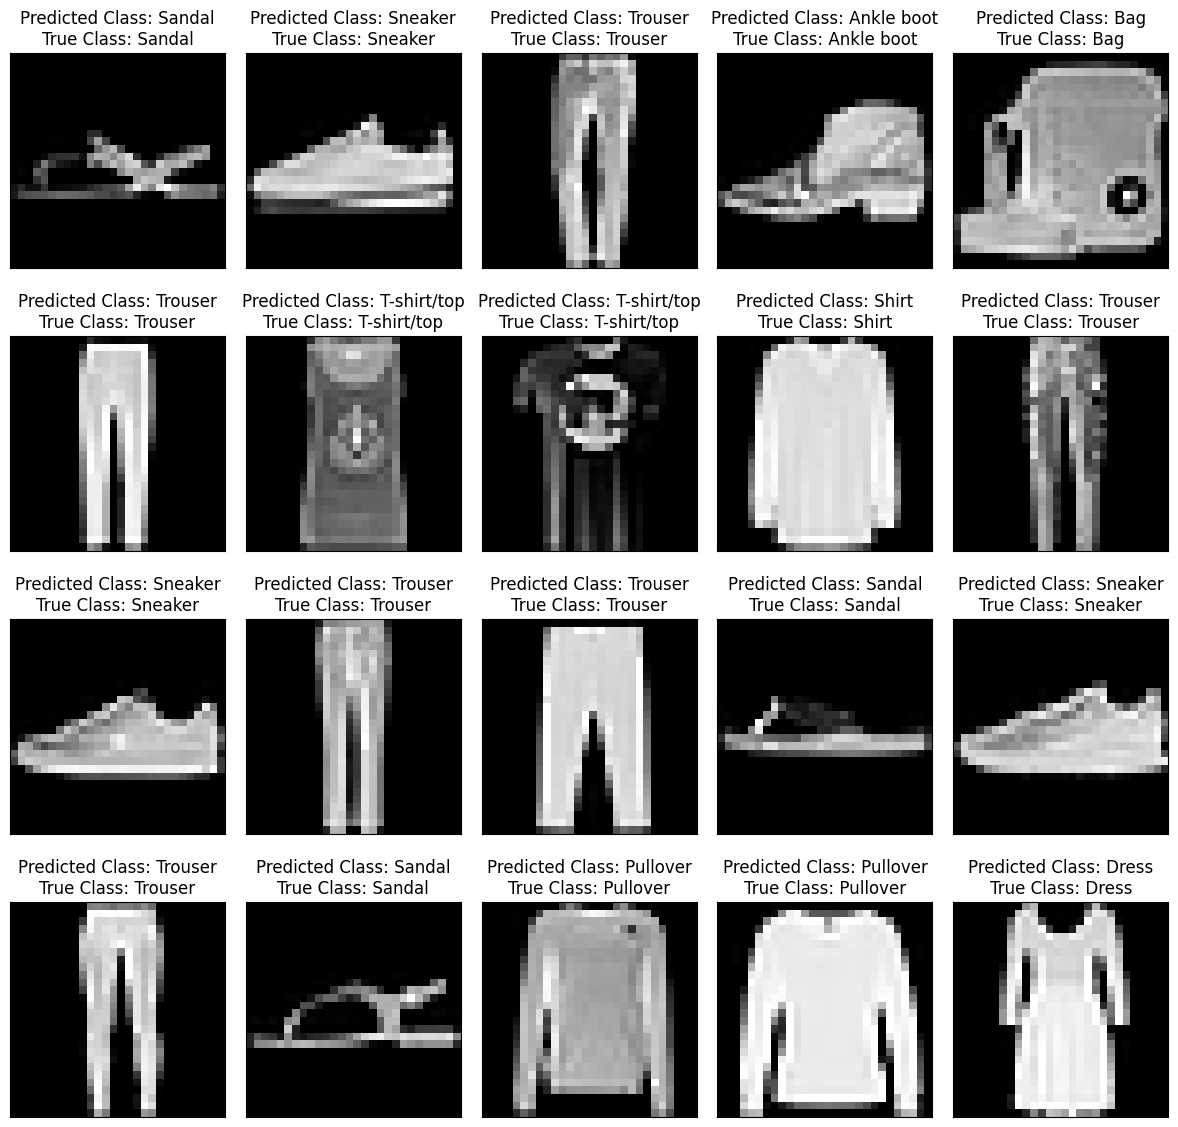

In [19]:
# Make multiple predictions on Test set
from random import randint

# Display multiple images
fig_display = plt.figure(figsize=[12, 12])
chosen_idx = randint(0, 10000-21)

# Scan image in array
for indx in range(chosen_idx, chosen_idx+20, 1):
  pred_class = np.argmax(load_model_CNN.predict(X_test_scl[indx, :, :, 0].reshape(1, 28, 28, 1), verbose=False))
  axes = fig_display.add_subplot(4, 5, indx - chosen_idx +1)
  axes.imshow(X_test[indx, :, :], cmap='gray')
  axes.set_xticks([ ])
  axes.set_yticks([ ])
  axes.set_title("Predicted Class: {str1}\nTrue Class: {str2}".format(str1=name_class[pred_class], 
                                                    str2=name_class[Y_test[indx]]
                                                    ))
  fig_display.tight_layout(pad=1.5)